In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import scikitplot as skplt
from typing import List
from itertools import combinations
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
df = pd.read_csv("insurance.csv", sep=",")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
"""def changeLabels(charge):
    if charge >= 15000:
        return ">=15000"
    return "<15000"
df["charges"] = df["charges"].apply(changeLabels)
df.to_csv("insurance_labeled.csv",index=False)"""
def changeLabels(bmi):
    return round(bmi)
df["bmi"] = df["bmi"].apply(changeLabels)
df.to_csv("insurance_labeled.csv",index=False)

In [12]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,>=15000
1,18,male,34,1,no,southeast,<15000
2,28,male,33,3,no,southeast,<15000
3,33,male,23,0,no,northwest,>=15000
4,32,male,29,0,no,northwest,<15000
...,...,...,...,...,...,...,...
1333,50,male,31,3,no,northwest,<15000
1334,18,female,32,0,no,northeast,<15000
1335,18,female,37,0,no,southeast,<15000
1336,21,female,26,0,no,southwest,<15000


In [107]:
label_encoder = preprocessing.LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["region"] = label_encoder.fit_transform(df["region"])

In [108]:
feature_columns = ["age","sex","bmi","children","smoker","region"]

In [109]:
x = df[feature_columns].values
y = df.charges.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
model = RandomForestClassifier(100)

In [110]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[196   2]
 [ 15  55]]


In [112]:
cr = metrics.classification_report(y_test, y_pred)
print("Classification Report: ")
print(cr)

Classification Report: 
              precision    recall  f1-score   support

      <15000       0.93      0.99      0.96       198
     >=15000       0.96      0.79      0.87        70

    accuracy                           0.94       268
   macro avg       0.95      0.89      0.91       268
weighted avg       0.94      0.94      0.93       268



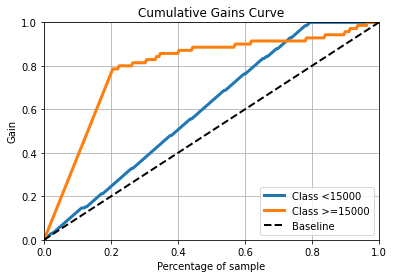

In [113]:
predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()